**Réalisé avec l'aide du tutoriel "PANDAS PYTHON Français - Introduction + Analyse du Titanic (17/30)" sur Youtube, par Machine Learnia.**

Lien de la vidéo: https://www.youtube.com/watch?v=zZkNOdBWgFQ

---

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Chargement des données.
data = pd.read_excel('titanicDataset.xls')

In [62]:
data.shape

(1309, 14)

In [63]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [64]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [65]:
# Suppression des colonnes inutiles.
data = data.drop(['name', 'sibsp', 'parch','ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [66]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [67]:
data.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [68]:
# Nettoyage des lignes avec valeur valeur manquante.
data = data.dropna(axis=0)
data.shape

(1046, 4)

In [69]:
data.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [41]:
# Nombre de passagers par classes.
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [42]:
# Nombre de passagers qui ont survécus : 427.
data['survived'].value_counts()

0    619
1    427
Name: survived, dtype: int64

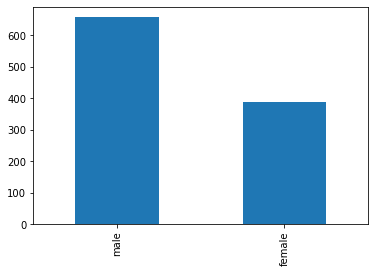

In [43]:
# Nombre de passagers par sex.
data['sex'].value_counts().plot.bar()
plt.show()

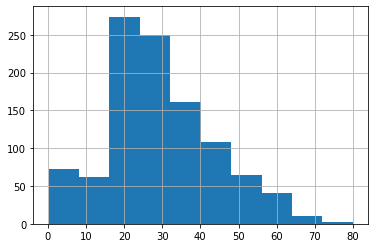

In [44]:
# Ages des passagers.
data['age'].hist()
plt.show()

In [45]:
# Moyennes des données par sexe.
data.groupby(['sex']).mean()

,pclass,survived,age
sex,,,
female,2.048969,0.752577,28.687071
male,2.300912,0.205167,30.585233


In [46]:
# Moyenne d'age et taux de survie par classe.
data.groupby(['pclass']).mean()

,survived,age
pclass,,
1,0.637324,39.159918
2,0.440613,29.506705
3,0.261477,24.816367


In [47]:
# Taux de survie et age moyen par sexe et par classe.
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [48]:
# Nombre de passagers par classe.
data['pclass'].value_counts()

3    501
1    284
2    261
Name: pclass, dtype: int64

In [49]:
# Nombre de passagers mineurs par classe.
data[data['age'] < 18]['pclass'].value_counts()

3    106
2     33
1     15
Name: pclass, dtype: int64

In [50]:
# Taux de survie et age moyen par sexe et par classe, pour les passagers mineurs.
data[data['age'] < 18].groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

In [51]:
# Affichage des colonnes sex et age pour les trois premières lignes en utilisant loc.
data.loc[0:2,  ['age', 'sex']]

,age,sex
0,29.0000,female
1,0.9167,male
2,2.0000,female


In [52]:
# Affichage de toutes les colonnes pour les 7 premières lignes en utilisant iloc.
data.iloc[0:6, :]

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
5,1,1,male,48.0000


---

### Exercice boolean indexing & découverte de map().

On souhaite créer quatre catégories d'ages.

In [53]:
# En utilisant boolean indexing.
data.loc[data['age'] <= 20, 'age'] = 0
data.loc[(data['age'] > 20) & (data['age'] <= 30), 'age'] = 1
data.loc[(data['age'] > 30) & (data['age'] <= 40), 'age'] = 2
data.loc[data['age'] > 40, 'age'] = 3

In [54]:
data.head()

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,1.0
4,1,0,female,1.0


In [55]:
# Nombre de passagers par catégorie.
data['age'].value_counts()

1.0    361
0.0    248
3.0    227
2.0    210
Name: age, dtype: int64

In [57]:
# Classe moyenne et taux de survie par catégorie d'âge.
data.groupby(['age']).mean()

,pclass,survived
age,,
0.0,2.568548,0.459677
1.0,2.371191,0.371191
2.0,2.109524,0.423810
3.0,1.643172,0.396476


In [58]:
# Utilisation de map avec une lambda pour incrémenter les catégories (découverte de map())
data['age'].map(lambda x: x+1)

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
1301    4.0
1304    1.0
1306    2.0
1307    2.0
1308    2.0
Name: age, Length: 1046, dtype: float64

In [70]:
# Définition d'une fonction qui retourne une chaine de caractère correspondant
# à la catégorie d'âge du passager.

def category_ages(age):
    if age <= 20:
        return '<=20 ans'
    elif (age > 20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'

In [71]:
# Application de la fonction en utilisant map()
data['age'].map(category_ages)

0       20-30 ans
1        <=20 ans
2        <=20 ans
3       20-30 ans
4       20-30 ans
          ...    
1301      +40 ans
1304     <=20 ans
1306    20-30 ans
1307    20-30 ans
1308    20-30 ans
Name: age, Length: 1046, dtype: object

In [72]:
# Enfin, on peut remplacer les catégories (male et female) par des valeurs
# en utilisant cat.codes.
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8

In [73]:
data

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1301,3,0,male,45.5000
1304,3,0,female,14.5000
1306,3,0,male,26.5000
1307,3,0,male,27.0000


---